In [2]:
import pandas as pd
import pandas_datareader as pdr
from fredapi import Fred
from dotenv import load_dotenv
from matplotlib import pyplot as plt
import plotly.express as px
import os

load_dotenv()


API_KEY = os.getenv("API_KEY")

In [22]:
fred = Fred(api_key=API_KEY)

fred.search("Inflation, germany", filter=('frequency', 'Annual'))

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
FPCPITOTLZGDEU,FPCPITOTLZGDEU,2023-11-18,2023-11-18,"Inflation, consumer prices for Germany",1960-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-09 14:09:03-05:00,43,Inflation as measured by the consumer price in...
CPGRLE01DEA657N,CPGRLE01DEA657N,2023-11-18,2023-11-18,Consumer Price Index: OECD Groups: All Items N...,1963-01-01,2022-01-01,Annual,A,Growth rate previous period,Growth rate previous period,Not Seasonally Adjusted,NSA,2023-03-15 13:23:04-05:00,2,OECD Descriptor ID: CPGRLE01 OECD unit ID: PC ...
CPGRLE01DEA659N,CPGRLE01DEA659N,2023-11-18,2023-11-18,Consumer Price Index: OECD Groups: All Items N...,1963-01-01,2022-01-01,Annual,A,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2023-03-15 13:34:14-05:00,1,OECD Descriptor ID: CPGRLE01 OECD unit ID: PC ...
DEUCPIBLS,DEUCPIBLS,2023-11-18,2023-11-18,Consumer Price Index in Germany (DISCONTINUED),1950-01-01,2012-01-01,Annual,A,Index 1982-1984=100,Index 1982-84=100,Not Seasonally Adjusted,NSA,2013-03-11 08:31:14-05:00,1,Bureau of Labor Statistics (BLS) has eliminate...


<Axes: title={'center': 'Inflacja w polsce'}, xlabel='Percentage', ylabel='Years'>

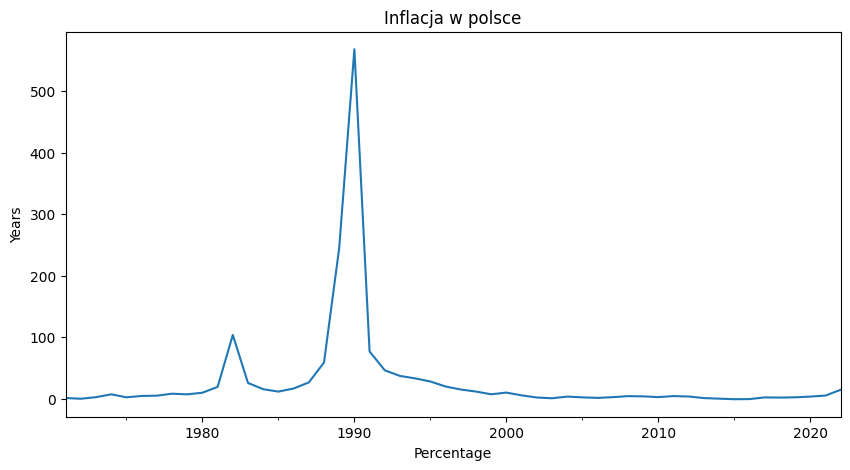

In [23]:
Inflation_PL = fred.get_series(series_id='FPCPITOTLZGPOL')
Inflation_GER = fred.get_series(series_id='FPCPITOTLZGDEU')

Inflation_PL.plot(figsize=(10, 5), title="Inflacja w polsce", xlabel="Percentage", ylabel="Years")

In [54]:
fig = px.line(Inflation_PL, labels={'value': 'Percentage', 'index': 'Year', 'variable': 'Countries'}, title="Inflation rate in Poland and other countries", line_group='variable')
fig.show()

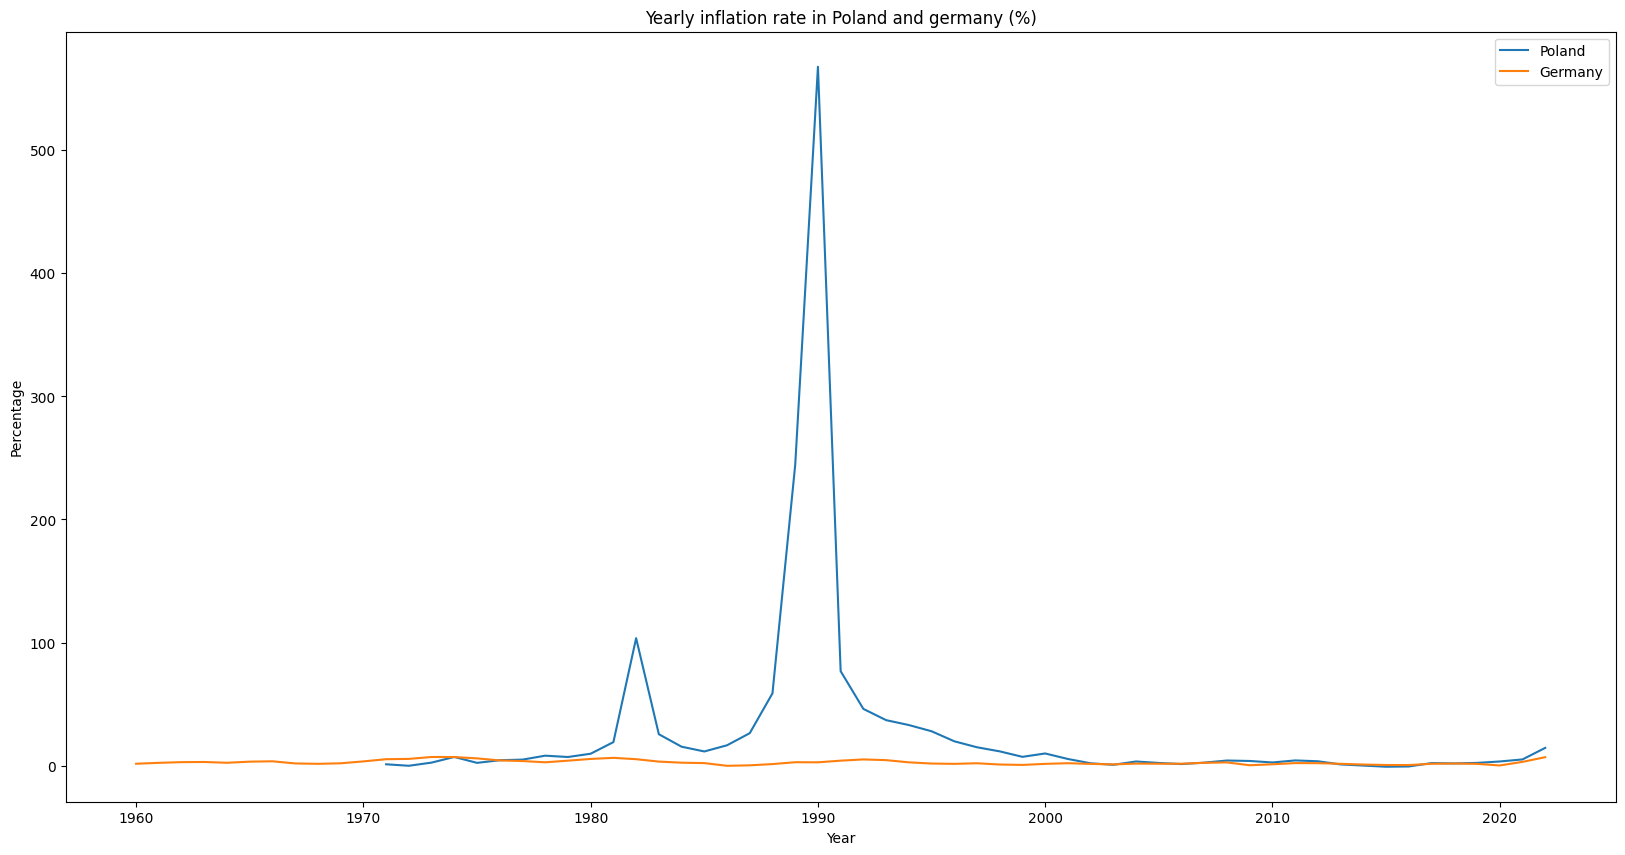

In [36]:
plt.figure(figsize=(20, 10))
plt.plot(Inflation_PL, label='Poland')
plt.plot(Inflation_GER, label='Germany')
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Yearly inflation rate in Poland and germany (%)")
plt.legend()
plt.show()